In [17]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn. cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("shopping_trends.csv", encoding = 'cp1251')
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [18]:
data.shape

(3900, 19)

In [19]:
data.dtypes

Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object

In [20]:
print(data.isna().sum())

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64


In [21]:
data = data.rename(columns = {'Age':  'age' , 'Purchase Amount (USD)':'purchase_amount' , 'Review Rating':'review_rating', 'Previous Purchases': 'previous_purchases'})
data.head()

,Customer ID,age,Gender,Item Purchased,Category,purchase_amount,Location,Size,Color,Season,review_rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,previous_purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [23]:
new_data = data[['age' , 'purchase_amount' , 'review_rating', 'previous_purchases']]
new_data.head()

,age,purchase_amount,review_rating,previous_purchases
0,55,53,3.1,14
1,19,64,3.1,2
2,50,73,3.1,23
3,21,90,3.5,49
4,45,49,2.7,31


In [7]:
scaler = StandardScaler()
s_data = scaler.fit_transform(new_data)
print(s_data)

[[ 0.71891344 -0.28562864 -0.90758357 -0.78583067]
 [-1.64862924  0.17885219 -0.90758357 -1.61655226]
 [ 0.39008807  0.55888195 -0.90758357 -0.16278948]
 ...
 [ 0.12702777 -1.13013923 -1.18686209 -0.09356268]
 [-0.00450238  0.72778407  0.06989124 -0.09356268]
 [ 0.52161822  0.89668619 -0.90758357  0.52947851]]


In [8]:
# Створення списку для зберігання вартості кластерів
wcss = []

# Визначення кількості кластерів
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(s_data) 
    wcss.append(kmeans.inertia_)

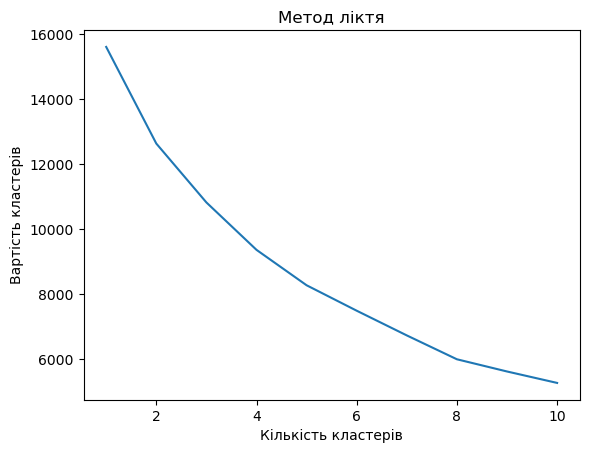

In [9]:
plt.plot(range(1, 11), wcss)
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Вартість кластерів')
plt.show()

In [10]:
optimal_cl = 5
kmeans = KMeans(n_clusters=optimal_cl, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(s_data)
cluster_labels = kmeans.labels_

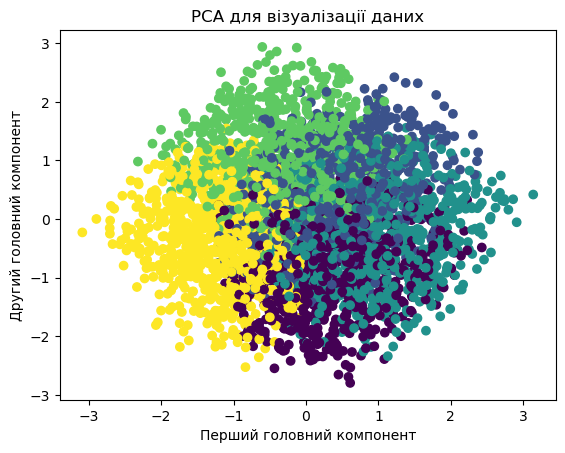

In [11]:
# Створення об'єкту PCA з бажаною кількістю компонент
pca = PCA(n_components=2)  # Можете використовувати 2 або 3 компоненти

# Застосування PCA до ваших даних
data_pca = pca.fit_transform(s_data)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Перший головний компонент')
plt.ylabel('Другий головний компонент')
plt.title('PCA для візуалізації даних')
plt.show()

Виконали масштабування даних, щоб всі числові ознаки мали однаковий масштаб. Використовували метод ліктя (Elbow Method), щоб визначити оптимальну кількість кластерів для наших даних. Цей метод дозволив нам знайти таку кількість кластерів, після якої зменшення вартості кластерів не було б значущим.З використанням оптимальної кількості кластерів, яку ми визначили на попередньому кроці, ми використовували алгоритм K-means для кластеризації даних. Кожному об'єкту був призначений ідентифікатор кластера.Щоб візуалізувати дані, які мають більше двох ознак, ми використовували метод головних компонентів (PCA) для зменшення розмірності даних і подальшої візуалізації.Кожен об'єкт був позначений відповідно до його приналежності до кластера.